In [13]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from scipy import constants
%matplotlib inline

50000000.0*(-flux - phi)**2 - 1000000000.0*cos(phi) + 1000000000.0


/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


256


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:79: ComplexWarning: Casting complex values to real discards the imaginary part


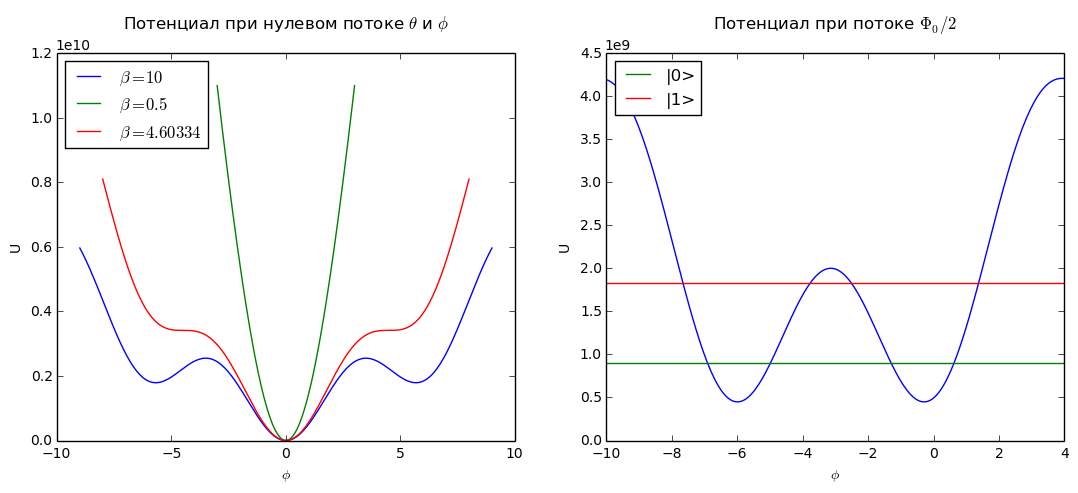

In [20]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJ1'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('C'), ['GND', '1'])
FQ3JJ.add_element(QInductance('I'), ['GND','2'])

   
N_grid = 256    
phi = QVariable('phi')
phixH = QVariable('flux')
#phixE = QVariable('φxE')
#phix2 = QVariable('φx2')
phi.create_grid(N_grid, 1)
FQ3JJ.add_variable(phi)
FQ3JJ.add_variable(phixH)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1','2'], 
                       ['phi', 'flux'], 
                       np.asarray([[0,0],[1,0],[1,1]]))

#EjEc_ratio = 80
flux_steps = 1
voltage_steps = 1
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 1e9
#Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
Ec = 1e9*3
FQ3JJ.find_element('JJ1').set_critical_current(Ej)
#FQ3JJ.find_element('JJ2').set_critical_current(Ej)
FQ3JJ.find_element('C').set_capacitance(4/Ec)
FQ3JJ.find_element('I').set_inductance(10/Ej)
flux = np.pi/2
phixH.set_parameter(flux,0)
print(FQ3JJ.symbolic_hamiltonian(False))
U = FQ3JJ.symbolic_hamiltonian(False)
calc = sympy.lambdify({"phi","flux"},U,'numpy')

phi_steps = 256
phi_space = np.linspace(-9,9,phi_steps)
U_space = calc(phi = phi_space,flux = 0)
FQ3JJ.find_element('I').set_inductance(0.5/Ej);
U2 = FQ3JJ.symbolic_hamiltonian(False)
calc2 = sympy.lambdify({"phi","flux"},U2,'numpy')
phi_space2 = np.linspace(-3,3,phi_steps)
fig = plt.figure(figsize=(13,5),dpi=300)
flux_0 = fig.add_subplot(121)
flux_0.set_title(r'Потенциал при нулевом потоке $\theta$ и $\phi$'+'\n')
flux_0.set_xlabel(r'$\phi$')
flux_0.set_ylabel(r'U')
flux_0.plot(phi_space,U_space, label = '$\\beta = 10$')
flux_0.plot(phi_space2, calc2(phi = phi_space2,flux = 0), label = '$\\beta = 0.5$')
phi_space3 = np.linspace(-8,8,phi_steps)
FQ3JJ.find_element('I').set_inductance(4.60334/Ej)
calc3 = sympy.lambdify({"phi","flux"},FQ3JJ.symbolic_hamiltonian(False),'numpy')
flux_0.plot(phi_space3, calc3(phi = phi_space3,flux = 0), label = '$\\beta = 4.60334$')
flux_pi = fig.add_subplot(122)
flux_pi.set_title(r'Потенциал при потоке $\Phi_0/2$ '+'\n')
flux_pi.set_xlabel(r'$\phi$')
flux_pi.set_ylabel(r'U')
flux_0.legend(bbox_to_anchor = [0,1], loc = 'upper left')
phi_space3 = np.linspace(-10,4,phi_steps)
flux_pi.plot(phi_space3, calc(phi=phi_space3,flux= np.pi))

fig.show()
#phixE.set_parameter(0,0)
#for flux_id, flux in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
#    phixH.set_parameter(flux,0)
#    FQ3JJ.calculate_potentials()
#    [eigenenergies,eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
#    energies[flux_id,:] = eigenenergies
FQ3JJ.find_element('I').set_inductance(2/Ej)
FQ3JJ.calculate_potentials()
[eigenenergies,eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
energies[0,:] = eigenenergies
for energy_id, energy in enumerate(energies[0,0:2]):
    flux_pi.plot(phi_space3,energy*np.ones_like(phi_space3),label = "|" + str(energy_id) + ">")
flux_pi.legend(bbox_to_anchor = [0,1], loc = 'upper left')

In [15]:
print((eigenfunctions).shape)


(1, 32, 4)


/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


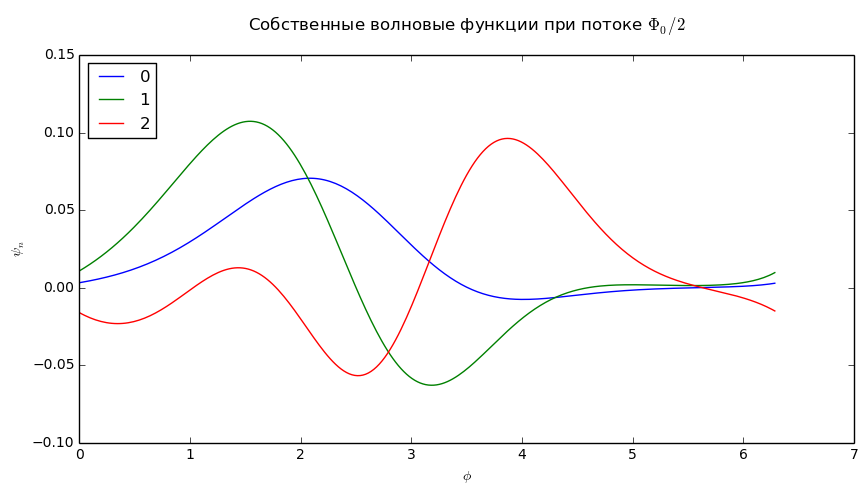

In [23]:
fig3 = plt.figure(figsize=(10,5),dpi=300)
funcp = fig3.add_subplot(111)
funcp.set_title(r'Собственные волновые функции при потоке $\Phi_0/2$'+'\n')
funcp.set_xlabel(r'$\phi$')
funcp.set_ylabel(r'$\psi_n$')
func_space = np.linspace(0,2*np.pi,N_grid)
for i in range(0,3):
    eigenfunc = [x[i] for x in eigenfunctions[0]]
    funcp.plot(func_space,eigenfunc,label=str(i))
funcp.legend(bbox_to_anchor = [0,1], loc = 'upper left')
fig3.show()

/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


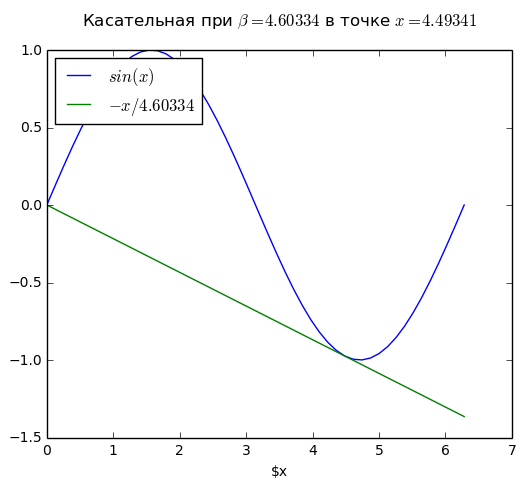

In [11]:

fig2 = plt.figure(figsize=(6,5),dpi=300)
eqsolve = fig2.add_subplot(111)
eqsolve.set_title('Касательная при $\\beta = 4.60334$ в точке $x = 4.49341$' + '\n')
eqsolve.set_xlabel(r'$x')
x = np.linspace(0,2*np.pi)
eqsolve.plot(x,np.sin(x),label = '$sin(x)$')
eqsolve.plot(x,-x/4.60334,label = '$-x/4.60334$')
eqsolve.legend(bbox_to_anchor = [0,1], loc = 'upper left')
fig2.show()